# Learning a 1D mapping f(x)

25-01-2024, Mike Wendels

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(12)

In [2]:
# input

f = lambda x : torch.exp(-x + 0.5) # function to be learned by neural network
X = torch.linspace(0, 1, 100).view(-1, 1) # grid (transposed to make each element into a data point)


In [3]:
y = f(X) # data

# neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = NeuralNetwork()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):

    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch == 1 or (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [2/1000], Loss: 1.3870
Epoch [100/1000], Loss: 0.0163
Epoch [200/1000], Loss: 0.0005
Epoch [300/1000], Loss: 0.0002
Epoch [400/1000], Loss: 0.0002
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


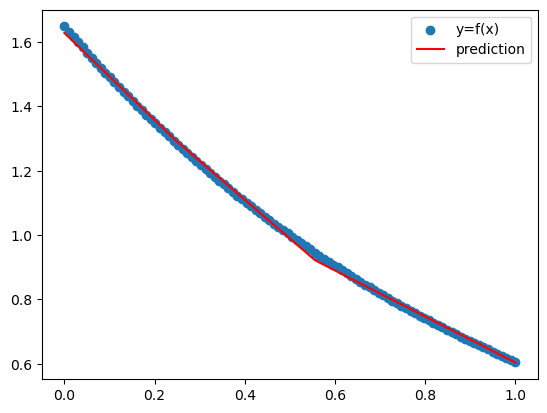

In [4]:
# Make predictions
model.eval()
with torch.no_grad():
    X_test = torch.linspace(0, 1, 100).view(-1, 1)
    y_pred = model(X_test)

plt.scatter(X.numpy(), y.numpy(), label='y=f(x)')
plt.plot(X_test.numpy(), y_pred.numpy(), color='red', label='prediction')
plt.legend()
plt.show()